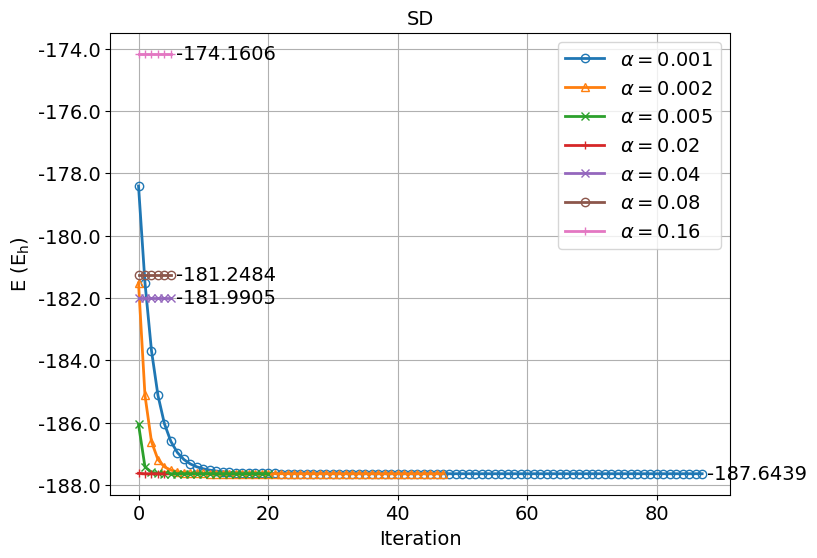

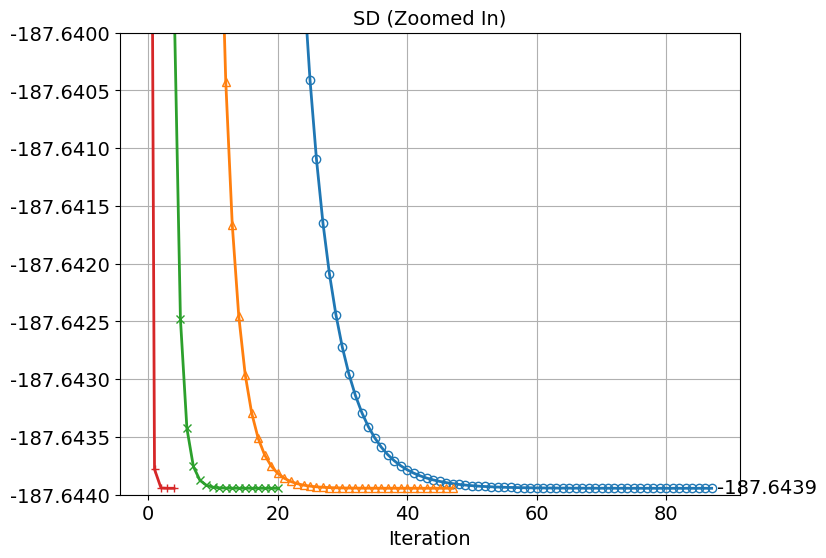

In [20]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter

#############
# USER ACTION REQUIRED
# Select molecule and the algorithm you want to plot
# note that the corrsponding csv must be generated first with the 
# 1_HF_calcs notebook
# Select molecule to plot 
molecule = "CO2" # or co2
# Select Algorithm to plot
alg="SD"
##############

filename = f"{molecule}_{alg}.csv"

# Read the data
data = defaultdict(list)  # alpha: list of (iteration, energy)

with open(filename, mode='r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        alpha = float(row['alpha'])
        iteration = int(row['iteration'])
        energy = float(row['energy'])
        data[alpha].append((iteration, energy))

# Plot
# Step 1: Collect the final data
markers = ['o', '^', 'x', '+', 'x', 'o', '+']

# Plot
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)
final_energies = []

if molecule == "H2O":
    if alg == "SD":
        alpha_to_show = (0.001, 0.04, 0.08,0.16)
    elif alg == "ADAGRAD":
        alpha_to_show = (0.002,0.16)
    elif alg == "RMSPROP":
        alpha_to_show = (0.001, 0.04, 0.08,0.16)
    elif alg == "ADAM":
        alpha_to_show = (0.001,2)
elif molecule == "CO2":
    if alg == "SD":
        alpha_to_show = (0.001, 0.04, 0.08,0.16)
    elif alg == "ADAGRAD":
        alpha_to_show = (0.002,0.16)
    elif alg == "RMSPROP":
        alpha_to_show = (0.001, 0.04, 0.08,0.16)
    elif alg == "ADAM":
        alpha_to_show = (0.001,2)

# Plot and optionally show label for selected alphas
for i, (alpha, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none', linewidth=2,label = fr'$\alpha = {alpha}$')
    #Plot the last energies for the selected alpha series (alpha_to_show)
    if any(np.isclose(alpha, a) for a in alpha_to_show):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel(r'E (E$_{\mathrm{h}}$)', fontsize=14)  # recta
plt.title(alg, fontsize=14)
plt.grid(True)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.1f}"))

if alg == "SD":
    plt.legend(fontsize=14)
    
plt.savefig(f"{molecule}_{alg}.png", dpi=300)

plt.show()

###
plt.figure(figsize=(8, 6))
plt.tick_params(axis='both', labelsize=14)

if molecule == "H2O":
    plt.ylim(-76.0272, -76.025)
    if alg == "SD":
        alpha_to_show = (0.001,1.0)
    elif alg == "ADAGRAD":
        alpha_to_show = (0.002,0.005, 0.02)
    elif alg == "RMSPROP":
        alpha_to_show = (0.001,0.002, 0.005)
    elif alg == "ADAM":
        alpha_to_show = (0.001, 0.002, 0.08,0.16)
elif molecule == "CO2":
    plt.ylim(-187.644, -187.64)
    if alg == "SD":
        alpha_to_show = (0.001,1.0)
    elif alg == "ADAGRAD":
        alpha_to_show = (0.002,0.005, 0.02)
    elif alg == "RMSPROP":
        alpha_to_show = (0.001,0.002, 0.005)
    elif alg == "ADAM":
        alpha_to_show = (0.001, 0.002, 0.08,0.16)


# Plot and optionally show label for selected alphas
for i, (alpha, points) in enumerate(sorted(data.items())):
    iterations, energies = zip(*points)
    marker = markers[i % len(markers)]
    plt.plot(iterations, energies, marker=marker, markerfacecolor='none',linewidth=2, label=f'alpha = {alpha}')

   #Plot the last energies for the selected alpha series (alpha_to_show)
    if any(np.isclose(alpha, a) for a in alpha_to_show):
        last_x = iterations[-1]
        last_y = energies[-1]
        plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')


# Labels and final set up
plt.xlabel('Iteration', fontsize=14)

plt.title(f"{alg} (Zoomed In)", fontsize=14)
#plt.ylabel(r'E (E$_{\text{h}}$)', fontsize=14)
#plt.ylabel(r'E (E$_{\mathrm{h}}$)', fontsize=14)  # recta

plt.grid(True)


# ticks format
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.4f}"))
#
plt.savefig(f"{molecule}_{alg}_{"zoom"}.png", dpi=300)

#plt.legend(fontsize=14)
plt.show()
